In [1]:
%matplotlib inline

# PyTorch: Custom nn Modules

这次我们实现自己的Module。用这种方法，可以实现更复杂的模型。

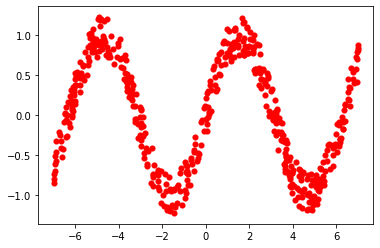

In [3]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

# N是batch_size； D_in是输入的维度
# H是隐层的维度；D_out是输出的维度
N, D_in, H, D_out = 512, 1, 100, 1

#创建数据集，y通过sin函数计算并加上部分噪声
x = np.random.rand(N, D_in)
x = (x - 0.5) * 14
y = np.sin(x) + (np.random.rand(N, D_out) - 0.5) * 0.5
plt.scatter(x,y,color="red", linewidth=0.1)
x = torch.from_numpy(x).type(dtype).to(device)
y = torch.from_numpy(y).type(dtype).to(device)

In [8]:
import torch

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

In [11]:
model = TwoLayerNet(D_in, H, D_out).to(device)
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
for epoch in range(50000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    if epoch % 1000 == 0:
        print("epoch:",epoch, "loss:", loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 311.13201904296875
epoch: 1000 loss: 132.28208923339844
epoch: 2000 loss: 106.18824005126953
epoch: 3000 loss: 83.19535827636719
epoch: 4000 loss: 65.1275634765625
epoch: 5000 loss: 51.460533142089844
epoch: 6000 loss: 41.27247619628906
epoch: 7000 loss: 33.7297477722168
epoch: 8000 loss: 28.141746520996094
epoch: 9000 loss: 24.003936767578125
epoch: 10000 loss: 20.939725875854492
epoch: 11000 loss: 19.533111572265625
epoch: 12000 loss: 17.832443237304688
epoch: 13000 loss: 16.00713348388672
epoch: 14000 loss: 17.826534271240234
epoch: 15000 loss: 15.703411102294922
epoch: 16000 loss: 15.32023811340332
epoch: 17000 loss: 13.248008728027344
epoch: 18000 loss: 17.85898780822754
epoch: 19000 loss: 13.354157447814941
epoch: 20000 loss: 13.226866722106934
epoch: 21000 loss: 13.26241683959961
epoch: 22000 loss: 12.760583877563477
epoch: 23000 loss: 13.433055877685547
epoch: 24000 loss: 12.633601188659668
epoch: 25000 loss: 12.468233108520508
epoch: 26000 loss: 11.9598073959350

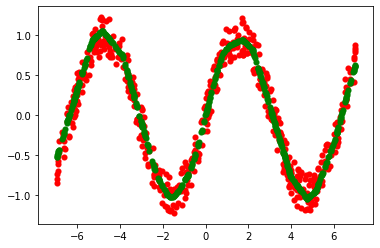

In [12]:
y_pred = model(x)
plt.scatter(x.detach().cpu().numpy(),y.detach().cpu().numpy(),color="red", linewidth=0.1)
plt.scatter(x.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), color='green', linewidth=0.1)